In [1]:
from __future__ import print_function
import numpy as np
import scipy.io as sio
import pandas as pd
from sklearn.metrics import mean_squared_error

np.random.seed(1337)  # for reproducibility

# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
batch_size = 10
#nb_classes = 10
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 128, 128
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# Training data, shuffled and split
WB = np.array(sio.loadmat('sandstone_data.mat')['Data'])
Y_data = np.array(sio.loadmat('sandstone_data.mat')['L'])
Y_data = (Y_data-min(Y_data))/(max(Y_data)-min(Y_data))
X_data = np.reshape(WB,(768,1,img_rows,img_cols))

# Add 380 generated images using VAE+ST from Ruijin's code
WB_gen = np.array(sio.loadmat('../generate_sandstone_data.mat')['Data'])
Y_gen = np.array(sio.loadmat('../generate_sandstone_data.mat')['L'])
Y_gen = (Y_gen-min(Y_gen))/(max(Y_gen)-min(Y_gen))
X_gen = np.transpose(np.reshape(WB_gen,(380,1,img_rows,img_cols)),[0,1,3,2])


# set traing data and validation data
X_train = np.concatenate((X_data[0:620], X_gen[0:380]), axis=0);
Y_train = np.concatenate((Y_data[0:620], Y_gen[0:380]), axis=0);
X_val = np.concatenate((X_data[700:768], X_gen[300:380]), axis=0);
Y_val = np.concatenate((Y_data[700:768], Y_gen[300:380]), axis=0);

"""
X_train = X_data[:720]
Y_train = Y_data[:720]

X_val = X_data[720:]
Y_val = Y_data[720:]
"""

WB1 = sio.loadmat('test_sandstone_data.mat')['Data']
X_test = np.reshape(WB1, (240, 1, img_rows, img_cols))
Y_test = sio.loadmat('test_sandstone_data.mat')['L']
Y_test = (Y_test-min(Y_test))/(max(Y_test) - min(Y_test))


if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (1000, 128, 128, 1)
1000 train samples
148 validate samples
240 test samples


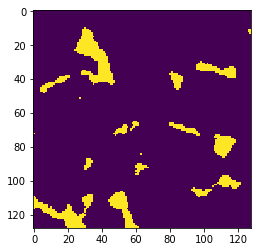

In [3]:
plt.imshow(X_gen[0,:].reshape(128,128))

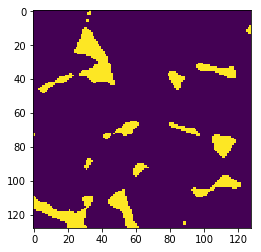

In [5]:
plt.imshow(X_test[0,:].reshape(128,128))

In [11]:
# CNN

model = Sequential()

model.add(Convolution2D(24, (6, 6), padding='same', input_shape=input_shape))
# model.add(BatchNormalization)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))

model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))

model.add(Convolution2D(48, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))

"""
model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))


model.add(Convolution2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))
"""


model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
# model.add(Dropout(0.25))
model.add(Dense(50))
model.add(Activation('relu'))
# model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [12]:
model.fit(X_train, Y_train, batch_size=40, epochs=100, verbose=1, validation_data=(X_val, Y_val))

Train on 1000 samples, validate on 148 samples
Epoch 1/100
1000/1000 [==============================] - 36s - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 2/100
1000/1000 [==============================] - 36s - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 3/100
1000/1000 [==============================] - 37s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 4/100
1000/1000 [==============================] - 35s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 5/100
1000/1000 [==============================] - 33s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 6/100
1000/1000 [==============================] - 34s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 7/100

1000/1000 [==============================] - 34s - loss: 6.7091e-04 - mean_squared_error: 6.7091e-04 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 52/100
1000/1000 [==============================] - 34s - loss: 9.1645e-04 - mean_squared_error: 9.1645e-04 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 53/100
1000/1000 [==============================] - 33s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 54/100
1000/1000 [==============================] - 34s - loss: 6.9033e-04 - mean_squared_error: 6.9033e-04 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 55/100
1000/1000 [==============================] - 34s - loss: 7.9653e-04 - mean_squared_error: 7.9653e-04 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 56/100
1000/1000 [==============================] - 33s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 57/100
1000/1000 [=========

1000/1000 [==============================] - 33s - loss: 3.0603e-04 - mean_squared_error: 3.0603e-04 - val_loss: 0.0048 - val_mean_squared_error: 0.0048


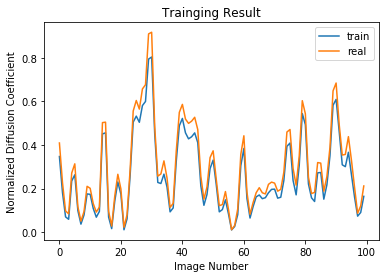

In [13]:
x=[]
for i in range(100):
    x.append(i)

pred=model.predict(X_train)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(x,pred[900:1000], label='train')
ax.plot(x,Y_train[900:1000],label='real')
plt.legend()
ax.set_title('Trainging Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Normalized Diffusion Coefficient')

# plt.savefig('training_result_2.png',dpi=400)

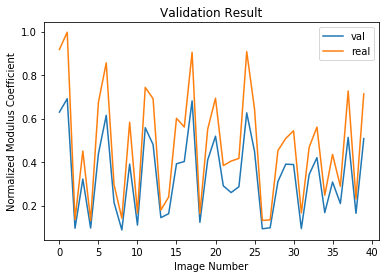

In [9]:
x=[]
for i in range(40):
    x.append(i)

pred=model.predict(X_val)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(x,pred[:40], label='val')
ax.plot(x,Y_val[:40],label='real')
plt.legend()
ax.set_title('Validation Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Normalized Modulus Coefficient')

0.0258511296436


"\nfig2 = plt.figure()\nax2 = fig2.add_subplot(1,1,1)\nax2.plot(x,se[0:100])\nax2.set_xlabel('Image Number')\nax2.set_ylabel('Difference')\n"

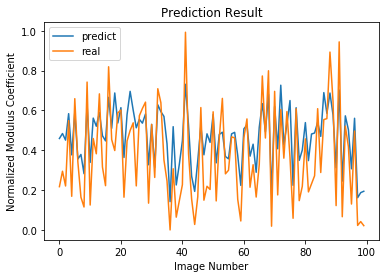

In [14]:
x=[]
for i in range(100):
    x.append(i)

pred=model.predict(X_test)
print(mean_squared_error(Y_test, pred))

fig1 = plt.figure()
ax1=fig1.add_subplot(1,1,1)

ax1.plot(x,pred[0:100], label='predict')
ax1.plot(x,Y_test[0:100],label='real')
plt.legend()
ax1.set_title('Prediction Result')
ax1.set_xlabel('Image Number')
ax1.set_ylabel('Normalized Modulus Coefficient')

"""
se = np.zeros([240])
for i in range(240):
    se[i] = (pred[i]-Y_test[i])/Y_test[i]

"""

'''
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(x,se[0:100])
ax2.set_xlabel('Image Number')
ax2.set_ylabel('Difference')
'''
# plt.savefig('prediction_result_2.png',dpi=400)

In [41]:
count = 0
for i in range(240):
    if np.abs(se[i])>=0.3:
        count += 1
        
count

108

In [30]:
threshold = 0.3
def find_image_nb(Input):
    image_nb = []
    for i in range(len(Input)):
        if abs(Input[i]) >= threshold:
            image_nb.append(i)
            
    return image_nb

In [32]:
image_nb = find_image_nb(se)
diff_test = X_test[image_nb]

In [21]:
# np.size(image_nb)
image_nb[4]

7

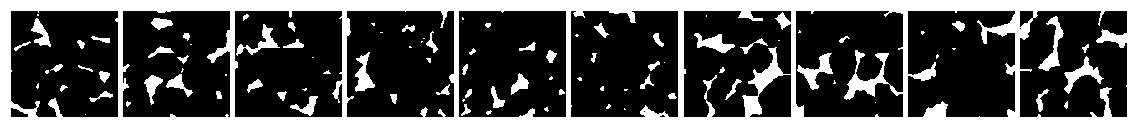

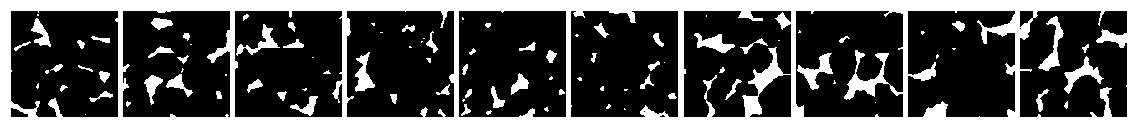

In [34]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,10))

'''
ax1=fig.add_subplot(1,2,1)
plt.axis('off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
plt.imshow(X_test[7].reshape(128,128))

ax1=fig.add_subplot(1,2,2)
plt.axis('off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
plt.imshow(diff_test[4].reshape(128,128))
'''

def plot(samples):
    fig = plt.figure(figsize=(20, 20))
    gs = gridspec.GridSpec(1, 10)
    gs.update(wspace=0.05, hspace=0.0)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.imshow(sample.reshape(128, 128), cmap='Greys_r')

plot(X_test[image_nb[:10]])
plot(diff_test[:10])

In [35]:
diff_test.shape
# np.size(image_nb)

(110, 128, 128, 1)

In [ ]:
diff_test = diff_test[:90]
image_nb = image_nb[:90]
sio.savemat('diff_fig.mat',{'img':diff_test, 'index':image_nb})

In [24]:
model.evaluate(X_test, Y_test, batch_size=40)

240/240 [==============================] - 0s     


[0.0042388046470781164, 0.0042388046470781164]

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 24)      888       
_________________________________________________________________
activation_14 (Activation)   (None, 128, 128, 24)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 24)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 32)        6944      
_________________________________________________________________
activation_15 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 48)        13872     
__________

In [26]:
model.save('best_trained_model.h5')